In [50]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

## Poisson distribution
In this notebook, two algorithms for generating pseudorandom numbers Poisson distributed are shown.
Additionally, an example of how binomial distribution with appropriate parameters approximates a Poisson distribution is given.

In [1]:
require(igraph)

Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.0.2”

Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
require(MASS)

Loading required package: MASS



#### Poisson approximation with exponential r.v.
The following algorithm, provided by Professor Satu Elisa Schaeffer, outputs an array of ```repl``` Poisson-distributed pseudo-random numbers. A rigorous proof of this fact is not given. The algorithm works by counting the number of exponentially generated random variables (with mean ```1/la```) needed for their sum to exceed a predefined number ```me```. This is equivalent to counting how many events occur in a time interval of length ```me``` for a Poisson process with parameter ```lambda```. Therefore, the Poisson numbers generated have mean ```la``` $\ast$ ```me```

In [3]:
gen_poiss_exp <- function(la, me, repl){
    ce = numeric()
    
    for (replica in 1:repl) {
    de = numeric()

    while (sum(de) < me) {
        de = c(de, rexp(1, la))
    }
    ce = c(ce, length(de)-1)
    }
    
    return(ce)
}

As stated, a proof that the algorithm works is not given. We limit ourselves to running the algorithm
three times, with parameters (```lambda```, ```me``` ) = (12, 3), (4,6), (9,7) and then generating Poisson 
distributed numbers with the respective mean ```la``` $\ast$ ```me```.
We compare their respective histograms, and use ```MASS::fitdistr``` to statistically verify our claim

********************
```la```= 12, ```me```= 3

In [52]:
algo1_ex1 <- gen_poiss_exp(la = 12, me = 3, repl = 1e4)

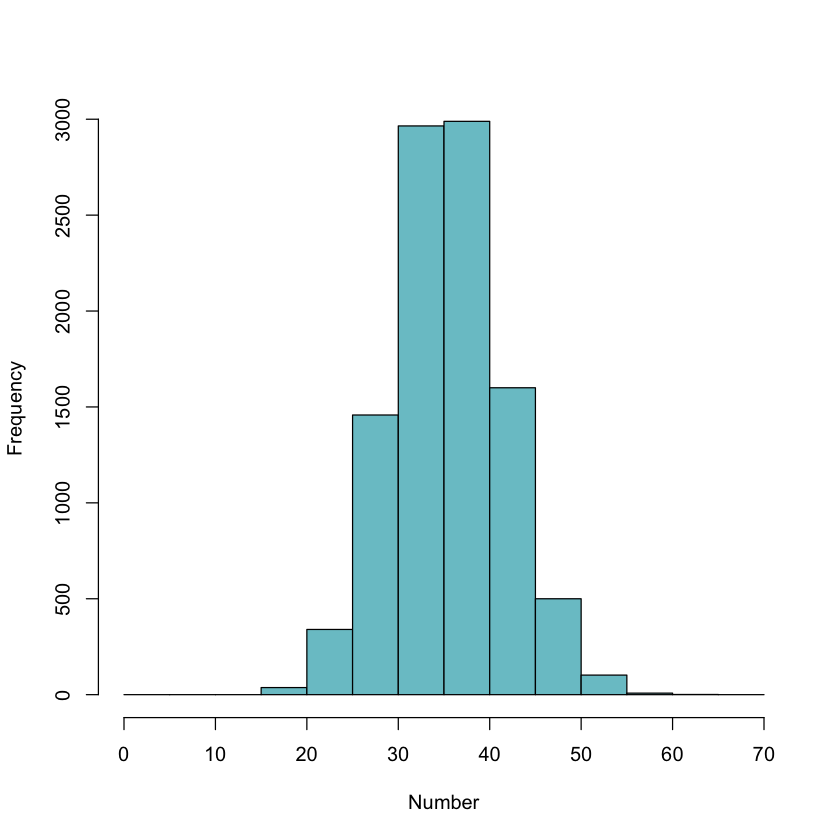

In [5]:
hist(algo1_ex1, main="", xlab="Number", col="cadetblue3", breaks=seq(0,70,by=5))

In [6]:
png(filename="algo1_ex1.png", height=2000, width=2000, res=400)
hist(algo1_ex1, main="", xlab="Number", col="cadetblue3", breaks=seq(0,70,by=5))
dev.off()

pdf 
  2

In [7]:
la <- 12
me <- 3
repl <- 1e4
po_exp_1 <- rpois(repl, la*me)

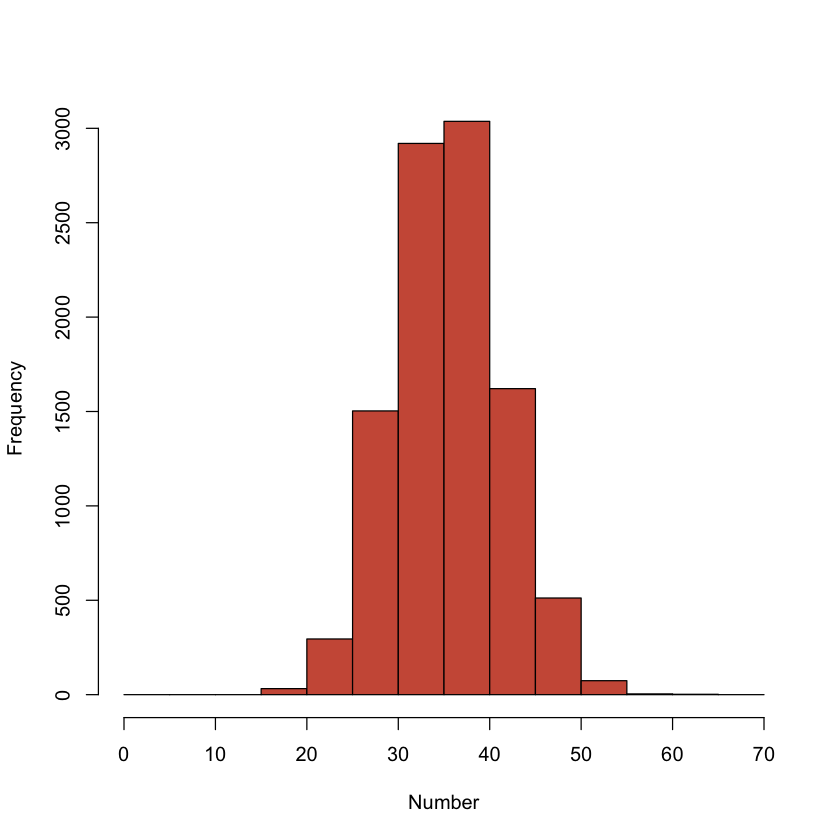

In [8]:
hist(po_exp_1, main="", xlab="Number", col="coral3", breaks=seq(0, 70, by=5))

In [9]:
png(filename="rpois_ex1.png", height=2000, width=2000, res=400)
hist(po_exp_1, main="", xlab="Number", col="coral3", breaks=seq(0, 70, by=5))
dev.off()

pdf 
  2

In [56]:
fitdistr(algo1_ex1, "Poisson")

     lambda   
  35.95420000 
 ( 0.05996182)

********************
```la```= 4, ```me```= 6

In [11]:
algo1_ex2 <- gen_poiss_exp(la = 4, me = 6, repl = 1e4)

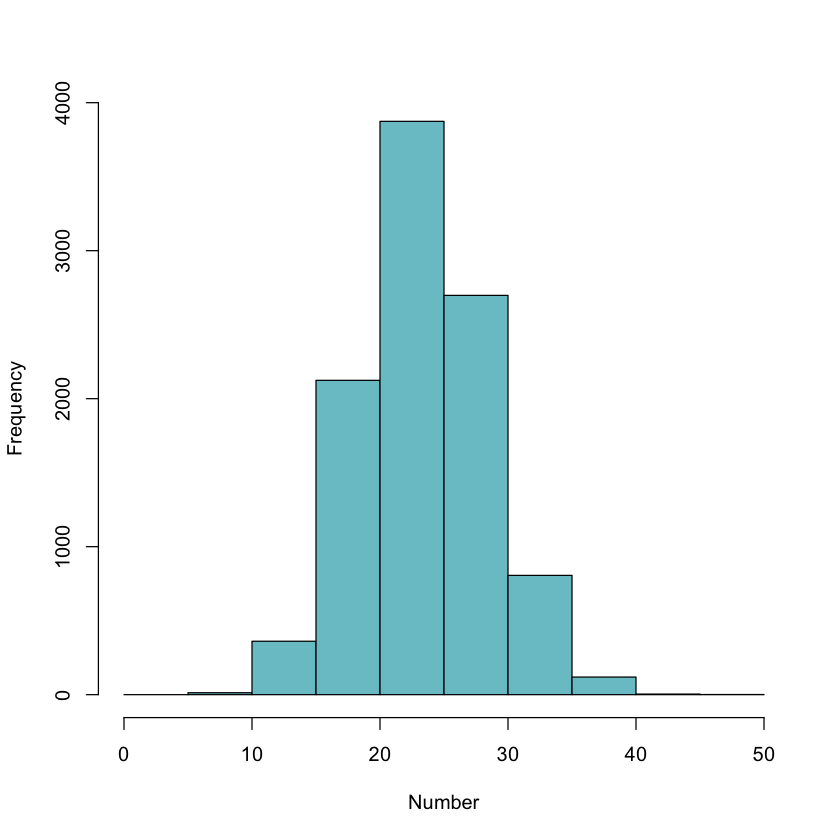

In [12]:
hist(algo1_ex2, main="", xlab="Number", col="cadetblue3", breaks=seq(0, 50, by=5))

In [13]:
png(filename="algo1_ex2.png", height=2000, width=2000, res=400)
hist(algo1_ex2, main="", xlab="Number", col="cadetblue3", breaks=seq(0, 50, by=5))
dev.off()

pdf 
  2

In [14]:
la = 4
me = 6
repl = 1e4
po_exp_2 <- rpois(repl, la*me)

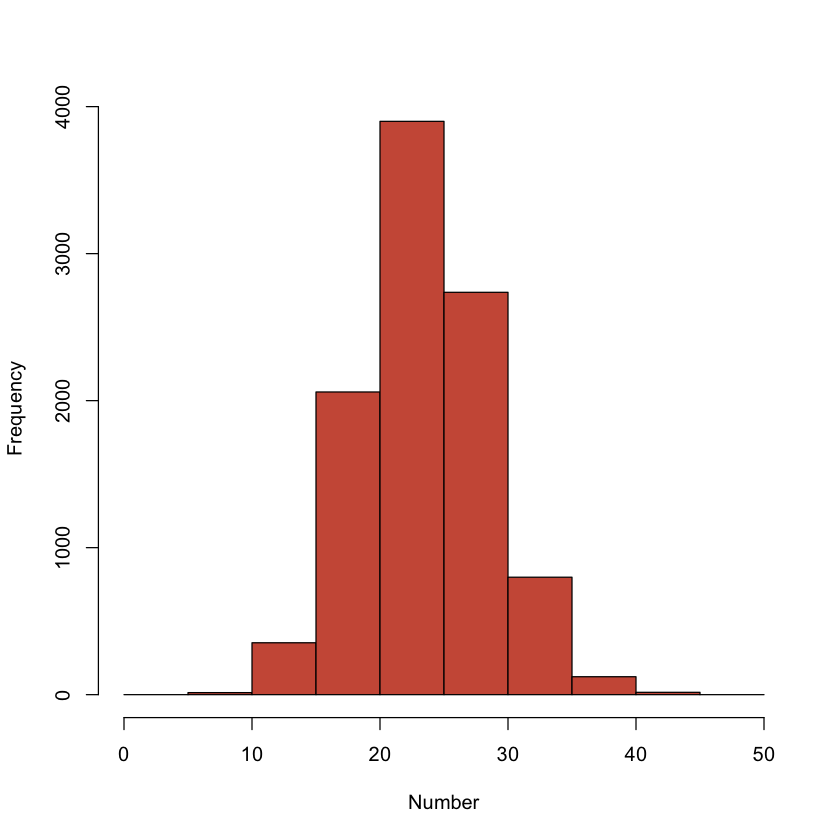

In [15]:
hist(po_exp_2, main="", xlab="Number", col="coral3", breaks=seq(0, 50, by=5))

In [16]:
png(filename="rpois_ex2.png", height=2000, width=2000, res=400)
hist(po_exp_2, main="", xlab="Number", col="coral3", breaks=seq(0, 50, by=5))
dev.off()

pdf 
  2

In [58]:
fitdistr(algo1_ex2, "Poisson")

     lambda   
  23.89590000 
 ( 0.04888343)

********************
```la```= 9, ```me```= 7

In [18]:
algo1_ex3 <- gen_poiss_exp(la = 9, me = 7, repl = 1e4)

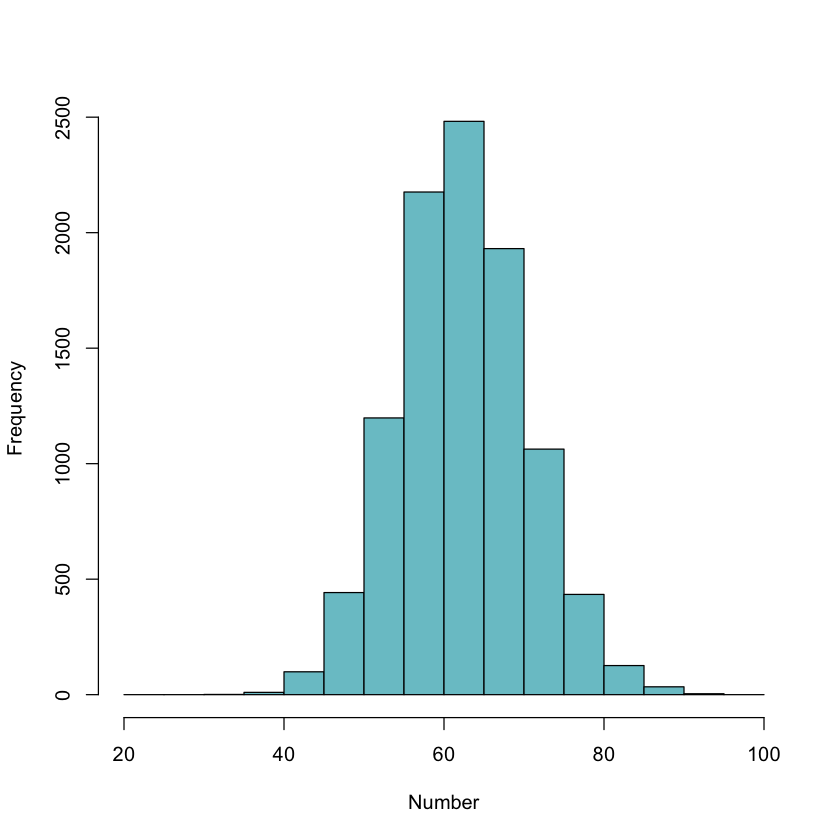

In [19]:
hist(algo1_ex3, main="", xlab="Number", col="cadetblue3", breaks=seq(20, 100, by=5))

In [20]:
png(filename="algo1_ex3.png", height=2000, width=2000, res=400)
hist(algo1_ex3, main="", xlab="Number", col="cadetblue3", breaks=seq(20, 100, by=5))
dev.off()

pdf 
  2

In [21]:
la = 9
me = 7
repl = 1e4
po_exp_3 <- rpois(repl, la*me)

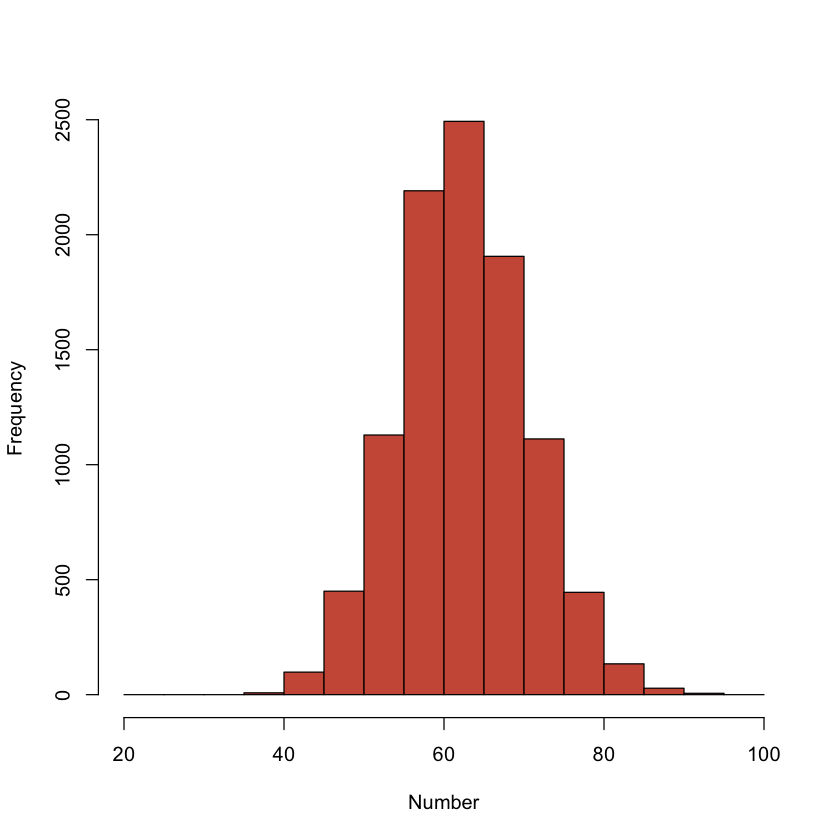

In [22]:
hist(po_exp_3, main="", xlab="Number", col="coral3", breaks=seq(20, 100, by=5))

In [23]:
png(filename="rpois_ex3.png", height=2000, width=2000, res=400)
hist(po_exp_3, main="", xlab="Number", col="coral3", breaks=seq(20, 100, by=5))
dev.off()

pdf 
  2

In [24]:
fitdistr(algo1_ex3, "Poisson")

     lambda   
  62.85320000 
 ( 0.07928001)

*******************
********************

#### Poisson approximation with uniform r.v.
The following algorithm, also provided by Professor Schaeffer, generates pseudo-random Poisson-distributed
numbers with mean ```la```. It counts the number of uniformly distributed random variables needed for their
product to be less than ```exp(-la)```.
A rigorous proof of why this works, based on the correctness of our previous algorithm, is given on the accompanying report found in the same repository as this notebook.

In [36]:
la = 10
mu = exp(-la)
cu = numeric()
repl = 10000
br = 5

for (replica in 1:repl) {
    du = c(1)
    while (prod(du) > mu) {
        du = c(du, runif(1))
    }
    cu = c(cu, length(du)-2)
}

knuth_algo <- cu

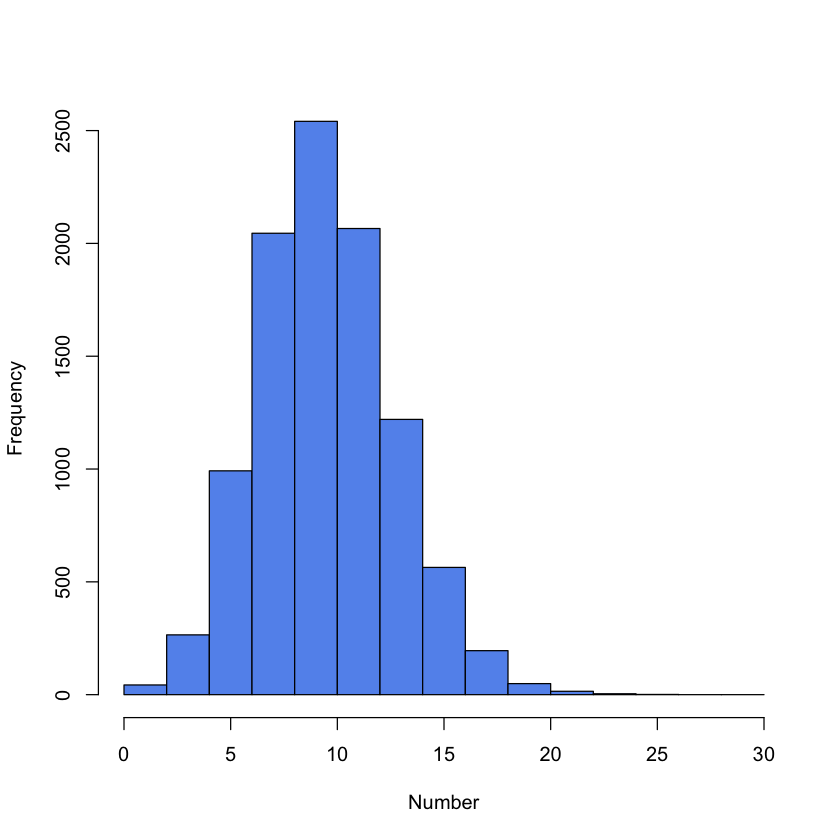

In [37]:
hist(knuth_algo, main="", xlab="Number", col="cornflowerblue", breaks=seq(0, 30, by=2))

In [38]:
png(filename="knuth_algo.png", height=2000, width=2000, res=400)
hist(knuth_algo, main="", xlab="Number", col="cornflowerblue", breaks=seq(0, 30, by=2))
dev.off()

pdf 
  2

In [39]:
po_unif <- rpois(repl, la)

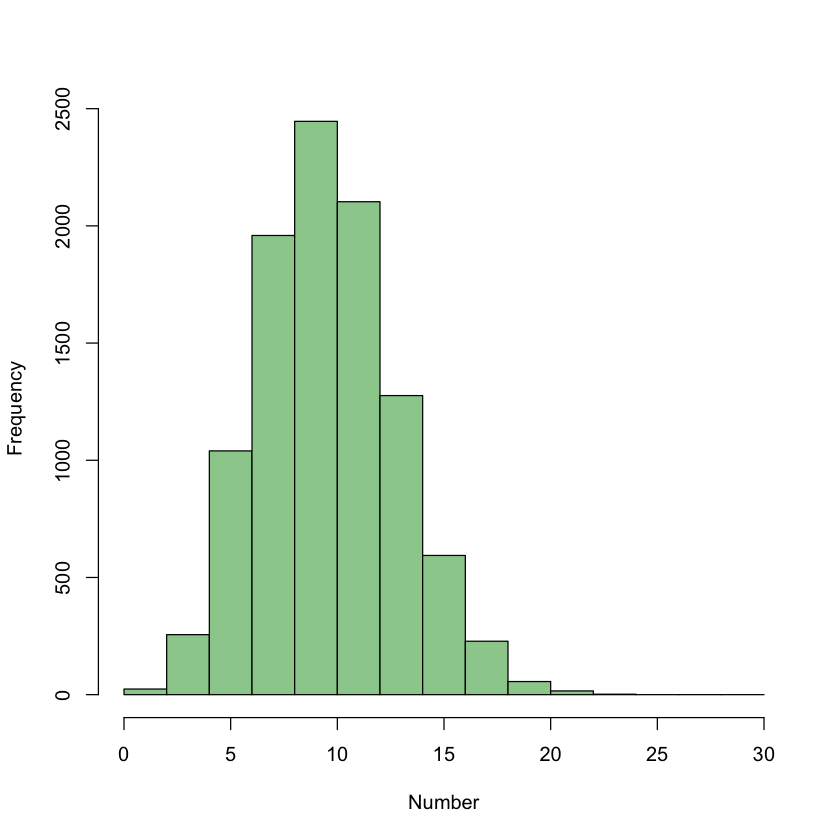

In [40]:
hist(po_unif, main="", xlab="Number", col="darkseagreen3", breaks=seq(0, 30, by=2))

In [41]:
png(filename="rpois_knuth.png", height=2000, width=2000, res=400)
hist(po_unif, main="", xlab="Number", col="darkseagreen3", breaks=seq(0, 30, by=2))
dev.off()


pdf 
  2

***********************
********************

#### Binomial approaches Poisson
We generate a random network with Erdös-Rényi model $G(n,p)$. This is known to have a Binomial degree distribution $B(n-1, p)$.
Making $n$ large and the probability $p$ small, we see that the degree distribution is a Poisson distribution.

In [42]:
gnp <- sample_gnp(10000, 1/10000, directed = FALSE, loops = FALSE)

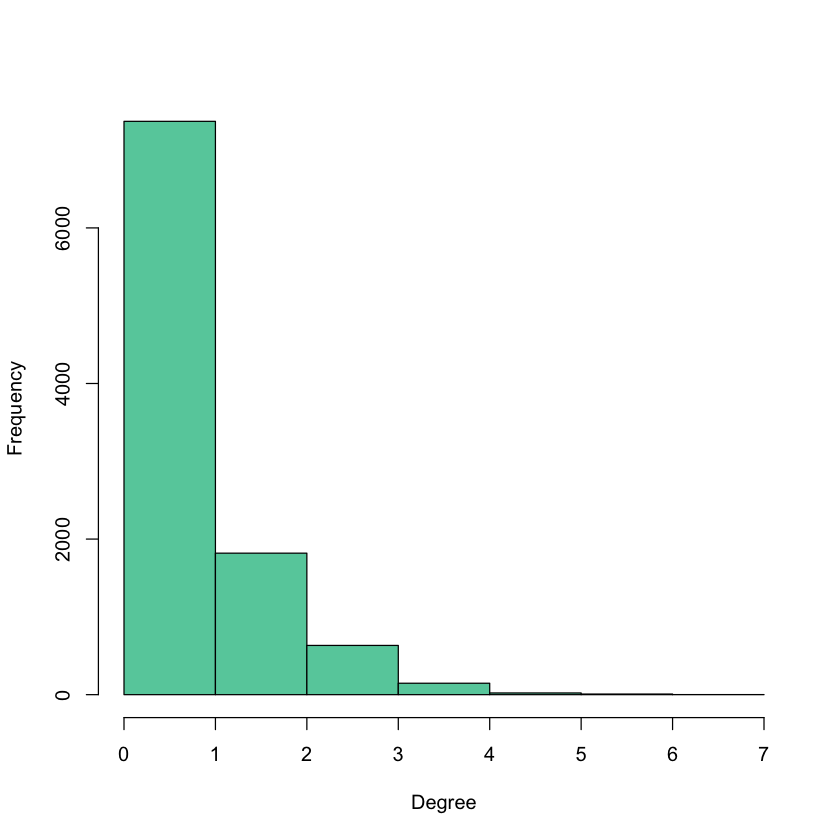

In [43]:
hist(degree(gnp), col="aquamarine3", xlab="Degree", main="", breaks=seq(0, 7, by=1))

In [44]:
png(filename="gnp_degree_histogram.png", height=2000, width=2000, res=400)
hist(degree(gnp), col="aquamarine3", xlab="Degree", main="", breaks=seq(0, 7, by=1))
dev.off()

pdf 
  2

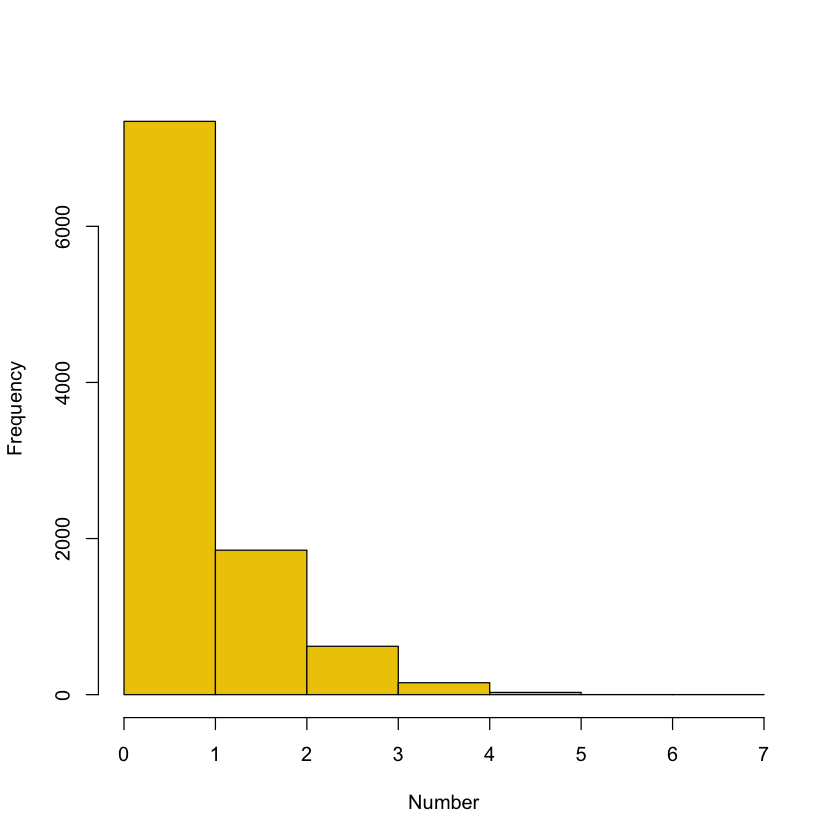

In [45]:
hist(rpois(10000, 1), col="gold2", xlab="Number", main="", breaks=seq(0,7,by=1))

In [46]:
png(filename="poiss_aprox_binomial.png", height=2000, width=2000, res=400)
hist(rpois(10000, 1), col="gold2", xlab="Number", main="", breaks=seq(0,7,by=1))
dev.off()

pdf 
  2

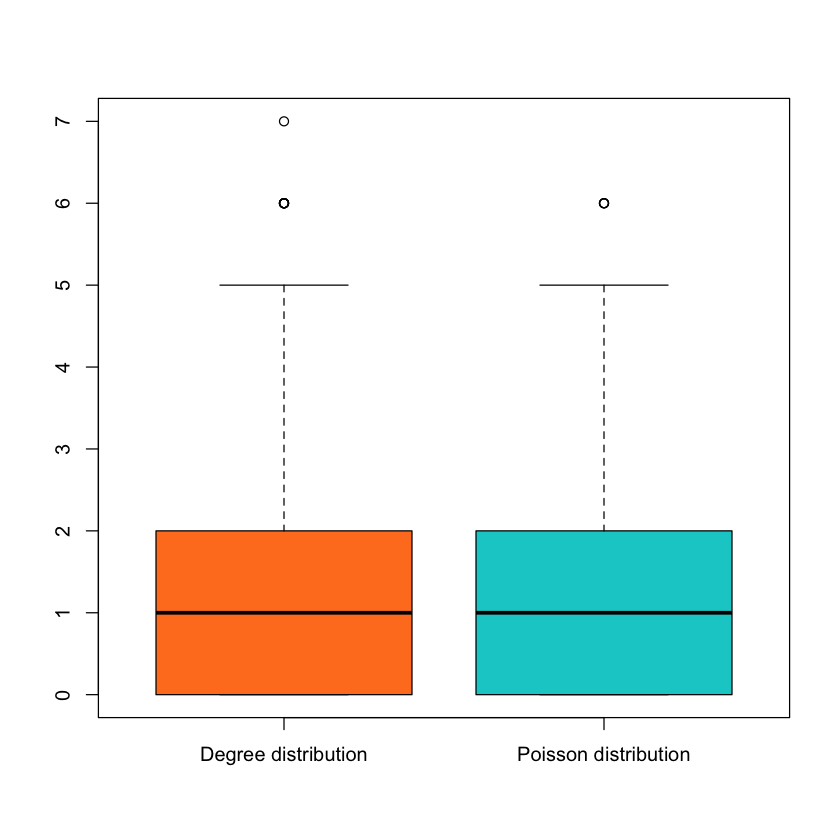

In [47]:
boxplot(degree(gnp), rpois(10000,1), 
        col=c("chocolate1","cyan3"), 
        names = c("Degree distribution", "Poisson distribution"))

In [48]:
png(filename="gnp_vs_poiss_boxplot.png", height=2000, width=2000, res=400)
boxplot(degree(gnp), rpois(10000,1), 
        col=c("chocolate1","cyan3"), 
        names = c("Degree distribution", "Poisson distribution"))
dev.off()

pdf 
  2